<h1>Calculate differences in encoding performance</h1>

In [2]:
# Functional imports
import os 
import numpy as np
import nibabel as nib

import fdr_correction_helpers
from encoding_helpers import calculate_difference
from data_prep_helpers import make_vol
import plotting_helpers

# Notebook specific imports
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
%autosave 5

Autosaving every 5 seconds


<h2>Setup</h2>

In [3]:
# Set data location
directory = os.path.join(os.path.expanduser('~'), 'Documents', 'Data')
print('Data location:', directory)

Data location: /Users/angira/Documents/Data


In [4]:
# Load data 
mask = nib.load(os.path.join(directory, 'group_gm_mask.nii.gz'))
print('Mask shape:', np.shape(mask))

Mask shape: (79, 95, 68)


In [5]:
# Load unthresholded full model predictions
full_34yrs = np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results', 'unthresholded', '3-4-yrs_full_scores_gm_mask.npy'))
full_5yrs = np.load(os.path.join(
    directory, '5-yrs','encoding_results', 'unthresholded', '5-yrs_full_scores_gm_mask.npy'))
full_7yrs = np.load(os.path.join(
    directory, '7-yrs', 'encoding_results', 'unthresholded', '7-yrs_full_scores_gm_mask.npy'))
full_812yrs = np.load(os.path.join(
    directory, '8-12-yrs','encoding_results', 'unthresholded', '8-12-yrs_full_scores_gm_mask.npy'))
full_adults = np.load(os.path.join(
    directory, 'adults', 'encoding_results', 'unthresholded', 'adults_full_scores_gm_mask.npy'))

In [6]:
moten_only_34yrs = np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results', 'unthresholded', '3-4-yrs_moten_only_scores_gm_mask.npy'))
moten_only_5yrs = np.load(os.path.join(
    directory, '5-yrs','encoding_results', 'unthresholded', '5-yrs_moten_only_scores_gm_mask.npy'))
moten_only_7yrs = np.load(os.path.join(
    directory, '7-yrs', 'encoding_results', 'unthresholded', '7-yrs_moten_only_scores_gm_mask.npy'))
moten_only_812yrs = np.load(os.path.join(
    directory, '8-12-yrs','encoding_results', 'unthresholded', '8-12-yrs_moten_only_scores_gm_mask.npy'))
moten_only_adults = np.load(os.path.join(
    directory, 'adults', 'encoding_results', 'unthresholded', 'adults_moten_only_scores_gm_mask.npy'))

In [6]:
social_only_34yrs = np.load(os.path.join(
    directory, '3-4-yrs', 'encoding_results', 'unthresholded', '3-4-yrs_social_only_scores_gm_mask.npy'))
social_only_5yrs = np.load(os.path.join(
    directory, '5-yrs','encoding_results', 'unthresholded', '5-yrs_social_only_scores_gm_mask.npy'))
social_only_7yrs = np.load(os.path.join(
    directory, '7-yrs', 'encoding_results', 'unthresholded', '7-yrs_social_only_scores_gm_mask.npy'))
social_only_812yrs = np.load(os.path.join(
    directory, '8-12-yrs','encoding_results', 'unthresholded', '8-12-yrs_social_only_scores_gm_mask.npy'))
social_only_adults = np.load(os.path.join(
    directory, 'adults', 'encoding_results', 'unthresholded', 'adults_social_only_scores_gm_mask.npy'))

<h3>Plot unthresholded scores</h3>

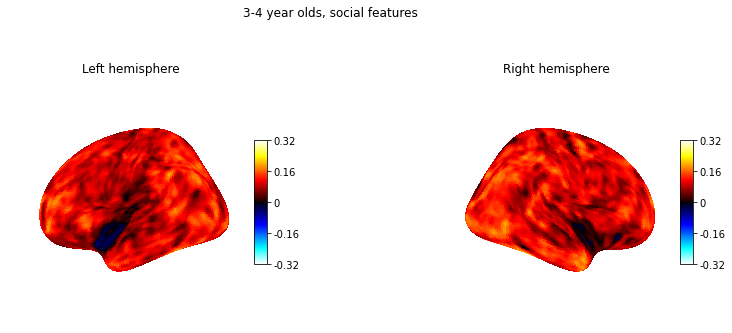

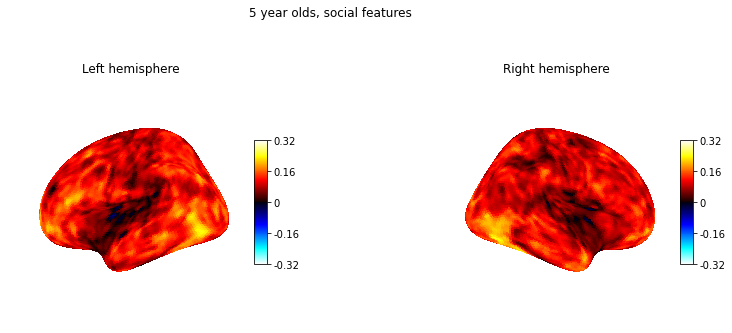

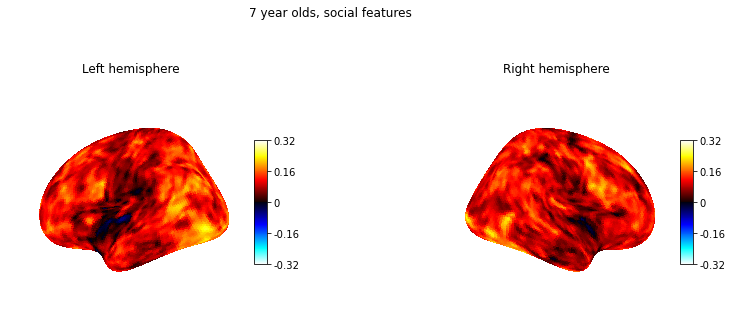

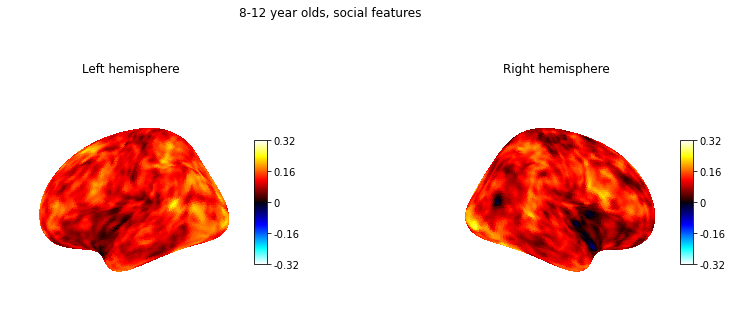

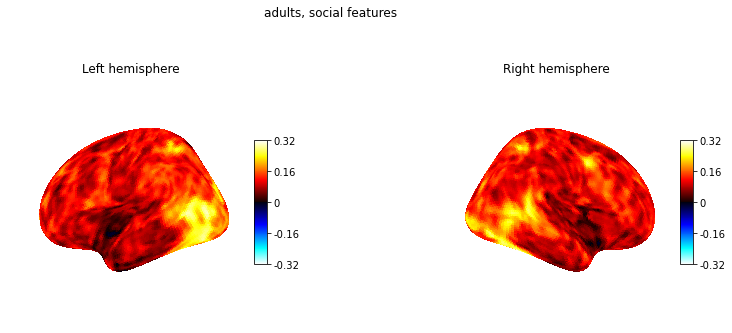

In [40]:
plotting_helpers.plot_lateral_only_with_vmax(vol=make_vol(np.mean(social_only_34yrs, axis=0), mask), 
                                   title='3-4 year olds, social features', 
                                   vis_threshold=0.0, vmax=0.32)

plotting_helpers.plot_lateral_only_with_vmax(vol=make_vol(np.mean(social_only_5yrs, axis=0), mask), 
                                   title='5 year olds, social features', 
                                   vis_threshold=0.0, vmax=0.32)

plotting_helpers.plot_lateral_only_with_vmax(vol=make_vol(np.mean(social_only_7yrs, axis=0), mask), 
                                   title='7 year olds, social features', 
                                   vis_threshold=0.0, vmax=0.32)

plotting_helpers.plot_lateral_only_with_vmax(vol=make_vol(np.mean(social_only_812yrs, axis=0), mask), 
                                   title='8-12 year olds, social features', 
                                   vis_threshold=0.0, vmax=0.32)

plotting_helpers.plot_lateral_only_with_vmax(vol=make_vol(np.mean(social_only_adults, axis=0), mask), 
                                   title='adults, social features', 
                                   vis_threshold=0.0, vmax=0.32)

<h2>Get differences</h2>

In [10]:
def get_p_values(observed, null_dist):
    """
        Generates two-tailed p-value for each score relative to the null distribution
        Assumes null_dist takes the shape [n_voxels, n_iterations] 
    """
    p_vals = []
    num_iterations = np.shape(null_dist)[1]
    
    for i in range(len(observed)):
        
        # Extract relevant distribution from overall data
        observed_score = observed[i]
        null_scores = null_dist[i]
        
        # Get number of values greater than observed_score
        more_extreme_count = len(np.where(np.absolute(null_scores) >= np.absolute(observed_score))[0])
        
        # Calculate p-value
        p_val = (more_extreme_count + 1) / (num_iterations + 1)
        
        # Store p-value
        p_vals.append(p_val)
        
    return p_vals

<h3>3-4 year olds </h3>

Adults: (33, 367709) -- 3-4 year olds: (31, 367709)


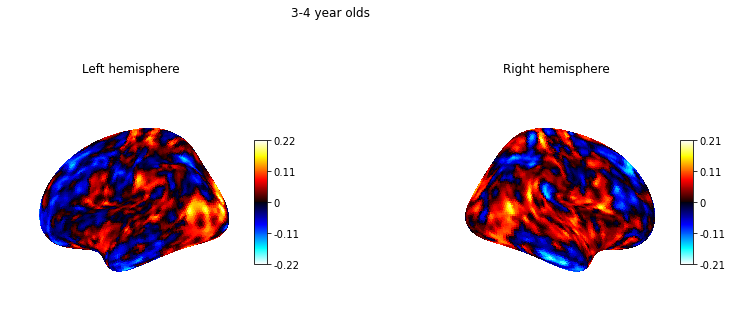

In [43]:
full_diff_34yrs = calculate_difference(full_adults, full_34yrs)

print('Adults:', np.shape(full_adults), '-- 3-4 year olds:', np.shape(full_34yrs))
plotting_helpers.plot_lateral_only(vol=make_vol(full_diff_34yrs, mask), 
                                   title='3-4 year olds', 
                                   vis_threshold=0.0)

In [35]:
full_null_comparison_34yrs = fdr_correction_helpers.generate_null_comparison(group1=full_adults, 
                                                                             group2=full_34yrs, 
                                                                             n_permutations=5000)
print('Null distribution:', np.shape(full_null_comparison_34yrs))

Null distribution: (367709, 5000)


In [54]:
full_p_34yrs = get_p_values(observed=full_diff_34yrs, null_dist=full_null_comparison_34yrs)
print('p values:', np.shape(full_p_34yrs))

p values: (367709,)


In [65]:
full_thresholded_34yrs, full_sig_34yrs = fdr_correction_helpers.get_fdr_controlled(p=full_p_34yrs, 
                                                                                   threshold=0.05, 
                                                                                   observed=full_diff_34yrs)
print(full_sig_34yrs, 'significant voxels at threshold p < 0.05')

0 significant voxels at threshold p < 0.05


Adults: (33, 367709) -- 3-4 year olds: (31, 367709)


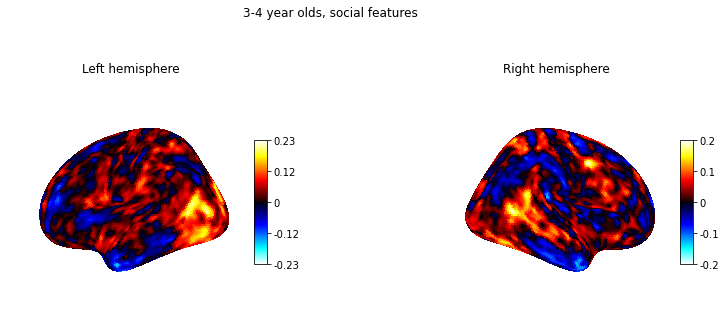

In [47]:
social_diff_34yrs = calculate_difference(social_only_adults, social_only_34yrs)

print('Adults:', np.shape(social_only_adults), '-- 3-4 year olds:', np.shape(social_only_34yrs))
plotting_helpers.plot_lateral_only(vol=make_vol(social_diff_34yrs, mask), 
                                   title='3-4 year olds, social features', 
                                   vis_threshold=0.0)

In [48]:
social_null_comparison_34yrs = fdr_correction_helpers.generate_null_comparison(group1=social_only_adults, 
                                                                               group2=social_only_34yrs, 
                                                                               n_permutations=5000)
print('Null distribution:', np.shape(social_null_comparison_34yrs))

Null distribution: (367709, 5000)


In [56]:
social_p_34yrs = get_p_values(observed=social_diff_34yrs, null_dist=social_null_comparison_34yrs)
print('p values:', np.shape(social_p_34yrs))

p values: (367709,)


In [68]:
social_thresholded_34yrs, social_sig_34yrs = fdr_correction_helpers.get_fdr_controlled(p=social_p_34yrs, 
                                                                                       threshold=0.05, 
                                                                                       observed=social_diff_34yrs)
print(social_sig_34yrs, 'significant voxels at threshold p < 0.05')

0 significant voxels at threshold p < 0.05


<h3>5 year olds</h3>

Adults: (33, 367709) -- 5 year olds: (31, 367709)


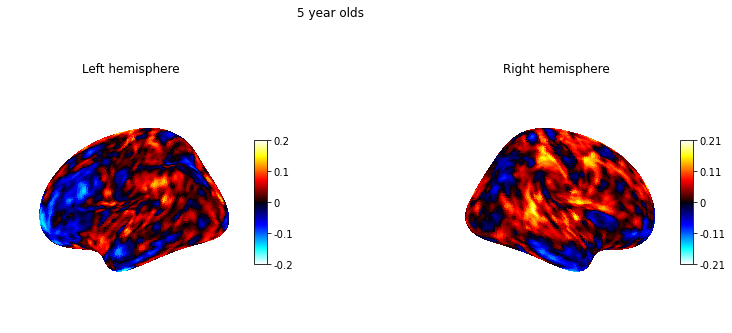

In [69]:
full_diff_5yrs = calculate_difference(full_adults, full_5yrs)

print('Adults:', np.shape(full_adults), '-- 5 year olds:', np.shape(full_5yrs))
plotting_helpers.plot_lateral_only(vol=make_vol(full_diff_5yrs, mask), 
                                   title='5 year olds', 
                                   vis_threshold=0.0)

In [70]:
full_null_comparison_5yrs = fdr_correction_helpers.generate_null_comparison(group1=full_adults, 
                                                                            group2=full_5yrs, 
                                                                            n_permutations=5000)
print('Null distribution:', np.shape(full_null_comparison_5yrs))

Null distribution: (367709, 5000)


In [71]:
full_p_5yrs = get_p_values(observed=full_diff_5yrs, null_dist=full_null_comparison_5yrs)
print('p values:', np.shape(full_p_5yrs))

p values: (367709,)


In [75]:
full_thresholded_5yrs, full_sig_5yrs = fdr_correction_helpers.get_fdr_controlled(p=full_p_5yrs, 
                                                                                   threshold=0.05, 
                                                                                   observed=full_diff_5yrs)
print(full_sig_5yrs, 'significant voxels at threshold p < 0.05')

0 significant voxels at threshold p < 0.05


Adults: (33, 367709) -- 5 year olds: (31, 367709)


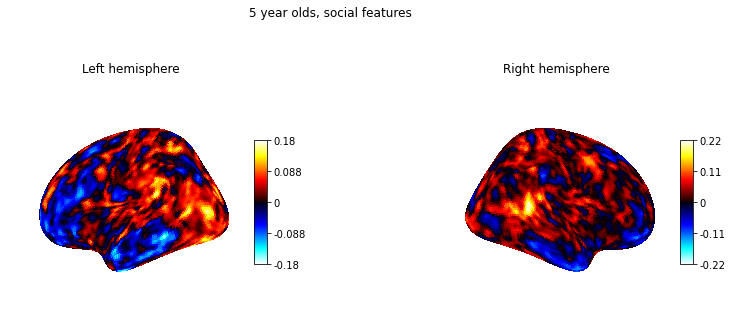

In [76]:
social_diff_5yrs = calculate_difference(social_only_adults, social_only_5yrs)

print('Adults:', np.shape(social_only_adults), '-- 5 year olds:', np.shape(social_only_5yrs))
plotting_helpers.plot_lateral_only(vol=make_vol(social_diff_5yrs, mask), 
                                   title='5 year olds, social features', 
                                   vis_threshold=0.0)

In [77]:
social_null_comparison_5yrs = fdr_correction_helpers.generate_null_comparison(group1=social_only_adults, 
                                                                              group2=social_only_5yrs, 
                                                                              n_permutations=5000)
print('Null distribution:', np.shape(social_null_comparison_5yrs))

Null distribution: (367709, 5000)


In [78]:
social_p_5yrs = get_p_values(observed=social_diff_5yrs, null_dist=social_null_comparison_5yrs)
print('p values:', np.shape(social_p_5yrs))

p values: (367709,)


In [85]:
social_thresholded_5yrs, social_sig_5yrs = fdr_correction_helpers.get_fdr_controlled(p=social_p_5yrs, 
                                                                                     threshold=0, 
                                                                                     observed=social_diff_5yrs)
print(social_sig_5yrs, 'significant voxels at threshold p < 0.05')

0 significant voxels at threshold p < 0.05


<h3>7 year olds</h3>

Adults: (33, 367709) -- 7 year olds: (23, 367709)


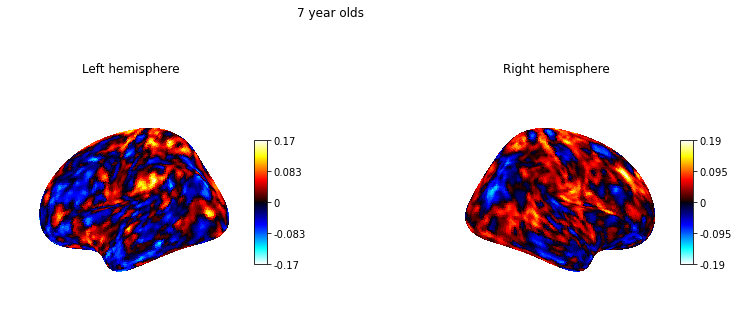

In [7]:
full_diff_7yrs = calculate_difference(full_adults, full_7yrs)

print('Adults:', np.shape(full_adults), '-- 7 year olds:', np.shape(full_7yrs))
plotting_helpers.plot_lateral_only(vol=make_vol(full_diff_7yrs, mask), 
                                   title='7 year olds', 
                                   vis_threshold=0.0)

In [8]:
full_null_comparison_7yrs = fdr_correction_helpers.generate_null_comparison(group1=full_adults, 
                                                                            group2=full_7yrs, 
                                                                            n_permutations=5000)
print('Null distribution:', np.shape(full_null_comparison_7yrs))

Null distribution: (367709, 5000)


In [11]:
full_p_7yrs = get_p_values(observed=full_diff_7yrs, null_dist=full_null_comparison_7yrs)
print('p values:', np.shape(full_p_7yrs))

p values: (367709,)


In [16]:
full_thresholded_7yrs, full_sig_7yrs = fdr_correction_helpers.get_fdr_controlled(p=full_p_7yrs, 
                                                                                   threshold=0.05, 
                                                                                   observed=full_diff_7yrs)
print(full_sig_7yrs, 'significant voxels at threshold p < 0.05')

0 significant voxels at threshold p < 0.05


Adults: (33, 367709) -- 5 year olds: (23, 367709)


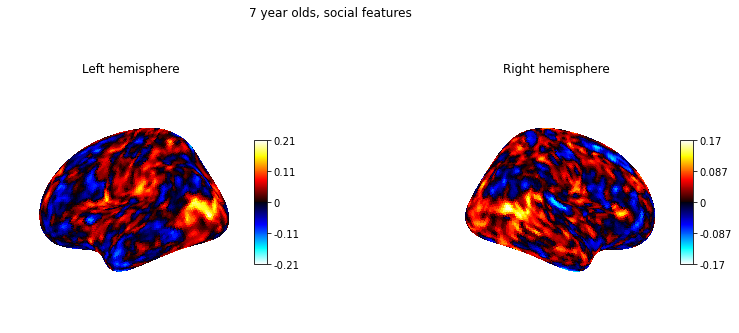

In [17]:
social_diff_7yrs = calculate_difference(social_only_adults, social_only_7yrs)

print('Adults:', np.shape(social_only_adults), '-- 5 year olds:', np.shape(social_only_7yrs))
plotting_helpers.plot_lateral_only(vol=make_vol(social_diff_7yrs, mask), 
                                   title='7 year olds, social features', 
                                   vis_threshold=0.0)

In [18]:
social_null_comparison_7yrs = fdr_correction_helpers.generate_null_comparison(group1=social_only_adults, 
                                                                              group2=social_only_7yrs, 
                                                                              n_permutations=5000)
print('Null distribution:', np.shape(social_null_comparison_7yrs))

Null distribution: (367709, 5000)


In [19]:
social_p_7yrs = get_p_values(observed=social_diff_7yrs, null_dist=social_null_comparison_7yrs)
print('p values:', np.shape(social_p_7yrs))

p values: (367709,)


In [33]:
social_thresholded_7yrs, social_sig_7yrs = fdr_correction_helpers.get_fdr_controlled(p=social_p_7yrs, 
                                                                                     threshold=0.05, 
                                                                                     observed=social_diff_7yrs)
print(social_sig_7yrs, 'significant voxels at threshold p < 0.05')

0 significant voxels at threshold p < 0.05


Adults: (33, 367709) -- 8-12 year olds: (34, 367709)


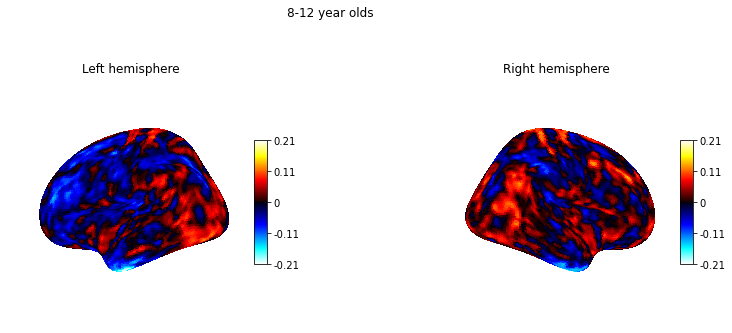

In [20]:
full_diff_812yrs = calculate_difference(full_adults, full_812yrs)

print('Adults:', np.shape(full_adults), '-- 8-12 year olds:', np.shape(full_812yrs))
plotting_helpers.plot_lateral_only(vol=make_vol(full_diff_812yrs, mask), 
                                   title='8-12 year olds', 
                                   vis_threshold=0.0)

In [21]:
full_null_comparison_812yrs = fdr_correction_helpers.generate_null_comparison(group1=full_adults, 
                                                                            group2=full_812yrs, 
                                                                            n_permutations=5000)
print('Null distribution:', np.shape(full_null_comparison_812yrs))

Null distribution: (367709, 5000)


In [22]:
full_p_812yrs = get_p_values(observed=full_diff_812yrs, null_dist=full_null_comparison_812yrs)
print('p values:', np.shape(full_p_812yrs))

p values: (367709,)


In [23]:
full_thresholded_812yrs, full_sig_812yrs = fdr_correction_helpers.get_fdr_controlled(p=full_p_812yrs, 
                                                                                     threshold=0.05, 
                                                                                     observed=full_diff_812yrs)
print(full_sig_812yrs, 'significant voxels at threshold p < 0.05')

1587 significant voxels at threshold p < 0.05


Adults: (33, 367709) -- 8-12 year olds: (34, 367709)


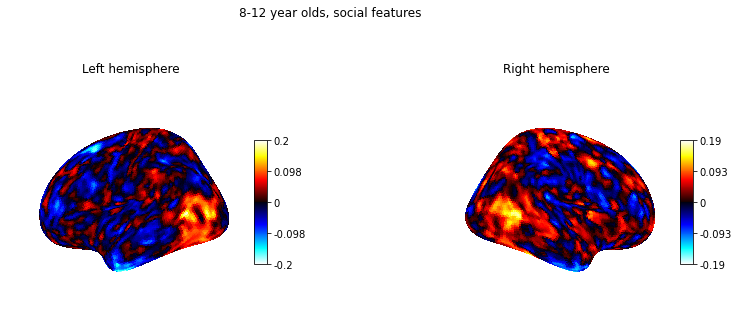

In [24]:
social_diff_812yrs = calculate_difference(social_only_adults, social_only_812yrs)

print('Adults:', np.shape(social_only_adults), '-- 8-12 year olds:', np.shape(social_only_812yrs))
plotting_helpers.plot_lateral_only(vol=make_vol(social_diff_812yrs, mask), 
                                   title='8-12 year olds, social features', 
                                   vis_threshold=0.0)

In [25]:
social_null_comparison_812yrs = fdr_correction_helpers.generate_null_comparison(group1=social_only_adults, 
                                                                              group2=social_only_812yrs, 
                                                                              n_permutations=5000)
print('Null distribution:', np.shape(social_null_comparison_812yrs))

Null distribution: (367709, 5000)


In [26]:
social_p_812yrs = get_p_values(observed=social_diff_812yrs, null_dist=social_null_comparison_812yrs)
print('p values:', np.shape(social_p_812yrs))

p values: (367709,)


In [37]:
social_thresholded_812yrs, social_sig_812yrs = fdr_correction_helpers.get_fdr_controlled(p=social_p_812yrs, 
                                                                                         threshold=0.05, 
                                                                                         observed=social_diff_812yrs)
print(social_sig_812yrs, 'significant voxels at threshold p < 0.05')

0 significant voxels at threshold p < 0.05
